## __Tarea 3 - Parcial 1 "Tiempo de Corrección"__
Acorde a información estratégica y de medición sobre el proceso de corrección se determinan los siguientes estados, en el estado de corregidos fácil se determina que el 60% de registros se resuelven, pero estos corregidos fácil pueden pasar al estatus de corrección complicada en un 30% y a un estatus de corrección muy compleja pueden pasar el 10%.

A esta estrategia de medición se determina que la corrección complicada podría (estancarse)/resolverse en este mismo estatus en un 15%, a la corrección final se estima transiten un 75% y pueden transitar al estado de corrección muy compleja el 10%.

En el estatus de corrección muy compleja podrían permanecer y resolverse un 10% en prolongarse su solución y estos podrán pasar al estatus de corregidos fácil y al estatus de corrección complicada un 89% y 1%, respectivamente.

Tome en cuenta y asuma que en cada estado mencionado [Corregidos Fácil, Corrección Complicada, Corrección Muy Compleja] se resuelven los porcentajes de los estados mencionados.


Tome en cuenta lo siguiente:

· Una corrección fácil se tarda en promedio 12 minutos.

· Una corrección complicada se puede tomar 20 minutos.

· Una corrección muy compleja tarda en promedio 31 minutos.

La jordana laboral es de lunes a viernes de 9 a.m. a 4 p.m.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#MATRIZ DE TRANSICIÓN CON ESTADOS ABSORBENTES
P = np.array([
    [0.0, 0.3, 0.1, 0.6], #CORRECCIÓN FÁCIL
    [0.0, 0.15, 0.1, 0.75], #CORRECCIÓN COMPLICADA
    [0.89, 0.01, 0.1, 0.0], #CORRECCIÓN MUY COMPLICADA
    [0.0, 0.0, 0.0, 1.0] #RESOLUCIÓN (ABSORBENTE)
    ])

#EXTRAER Q Y R DE FORMA CANÓNICA
Q = P[:3, :3]
R = P[:3, 3:]

#OBTENER LA MATRIZ FUNDAMENTAL N
I = np.eye(Q.shape[0])
N = np.linalg.inv(I - Q)


In [ ]:
#TIEMPO POR ESTADO EN MINUTOS
tiempo = np.array([12, 20, 31])

#SUPONIENDO QUE SE INICIA EN ESTADO DE CORRECCIÓN FÁCIL
estado_inicio = np.array([1, 0, 0])
tiempo_esperado_por_registro = estado_inicio @ N @ tiempo

In [ ]:
#CALCULAR EL TIEMPO PARA LOS REGISTROS
registros = 5499
minutos_totales = tiempo_esperado_por_registro * registros
horas_totales = minutos_totales / 60
dias_totales = horas_totales / 7
semanas_totales = dias_totales / 5

print("Tiempo esperado por registro:", round(tiempo_esperado_por_registro, 2), "minutos")
print("Total minutos:", round(minutos_totales, 2))
print("Total horas:", round(horas_totales, 2))
print("Total días laborales:", round(dias_totales, 0))
print("Total semanas laborales:", round(semanas_totales, 0))

Tiempo esperado por registro: [27.44 30.81 61.92] minutos
Total minutos: [150870.32 169445.5  340486.71]
Total horas: [2514.51 2824.09 5674.78]
Total días laborales: [359. 403. 811.]
Total semanas laborales: [ 72.  81. 162.]


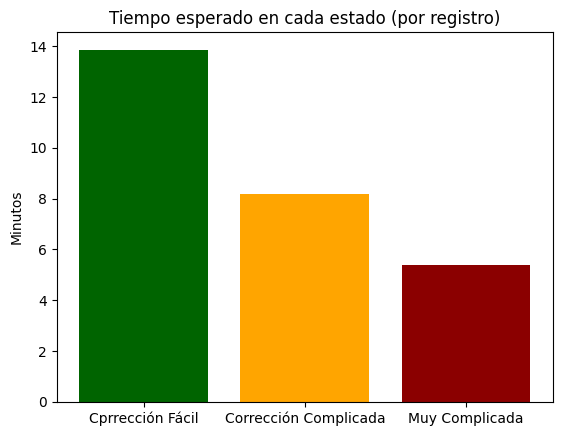

In [13]:
etiquetas = ["Cprrección Fácil", "Corrección Complicada", "Muy Complicada"]
tiempo_esperado_por_estado = (estado_inicio @ N) * tiempo

plt.bar(etiquetas, tiempo_esperado_por_estado, color=['darkgreen', 'orange', 'darkred'])
plt.title("Tiempo esperado en cada estado (por registro)")
plt.ylabel("Minutos")
plt.show()

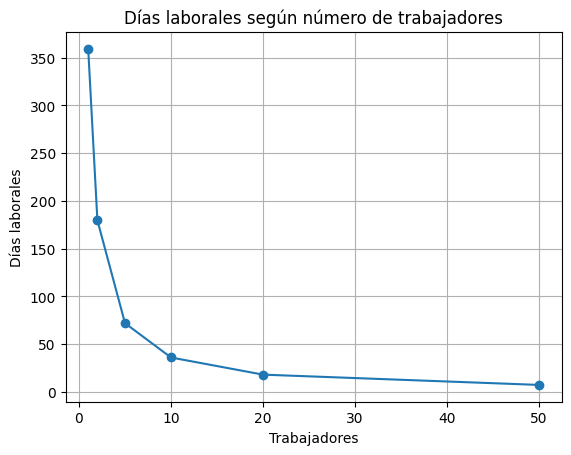

In [ ]:
trabajadores = [1, 2, 5, 10, 20, 50]
dias_por_trabajador = [dias_totales / w for w in trabajadores]

plt.plot(trabajadores, dias_por_trabajador, marker="o")
plt.title("Días laborales según número de trabajadores")
plt.xlabel("Trabajadores")
plt.ylabel("Días laborales")
plt.grid(True)
plt.show()